In [1]:
import kagglehub
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
warnings.filterwarnings('ignore')


In [2]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

#Обзор данных#

In [5]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('2017_2020_bmi.csv')

# Создание объекта LabelEncoder
le = LabelEncoder()

# Преобразование столбца
df['yr'] = le.fit_transform(df['yr'])
#df = df.drop(['yr'], axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      7770 non-null   int64  
 1   height  7770 non-null   float64
 2   weight  7770 non-null   float64
 3   bmi     7770 non-null   float64
 4   gender  7770 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 303.6 KB


In [7]:
df.describe()

,yr,height,weight,bmi,gender
count,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000
mean,13.212098,150.460698,52.817423,22.074587,0.499228
std,5.351230,22.463589,18.356921,3.515722,0.500032
min,0.000000,65.120000,7.080000,14.340000,0.000000
25%,11.000000,149.960000,42.700000,19.200000,0.000000
50%,15.000000,157.495000,58.350000,23.800000,0.000000
75%,18.000000,163.920000,66.050000,24.970000,1.000000
max,21.000000,174.500000,77.880000,26.260000,1.000000


In [8]:
df.head(10)

,yr,height,weight,bmi,gender
0,0,69.96,10.29,21.02,1
1,0,71.69,10.89,21.19,1
2,0,68.54,10.93,23.27,1
3,0,69.69,9.38,19.31,1
4,0,71.30,7.93,15.59,1
5,0,70.84,10.31,20.55,1
6,0,73.89,11.02,20.19,1
7,0,70.36,9.49,19.16,1
8,0,70.55,9.21,18.51,1
9,0,71.64,10.59,20.62,1


In [9]:
df.columns

Index(['yr', 'height', 'weight', 'bmi', 'gender'], dtype='object')

In [10]:
# Проверка на пропущенные значения
df.isnull().sum()

,0
yr,0
height,0
weight,0
bmi,0
gender,0


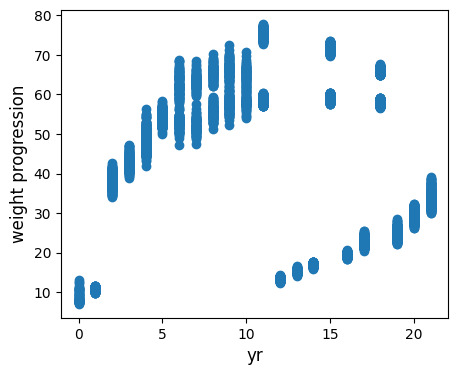

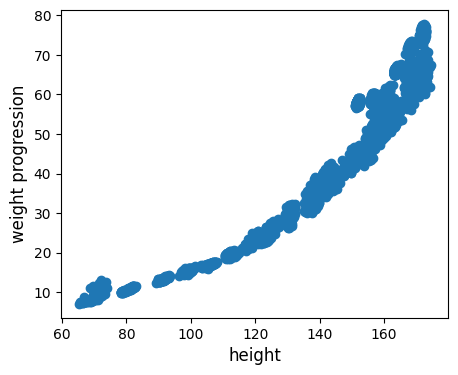

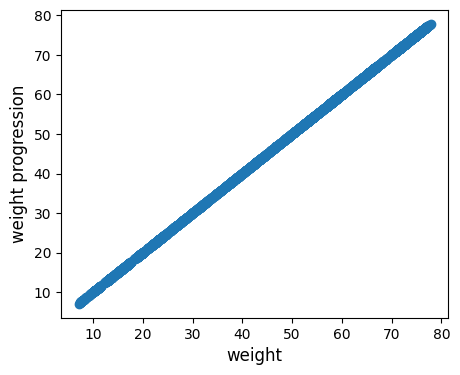

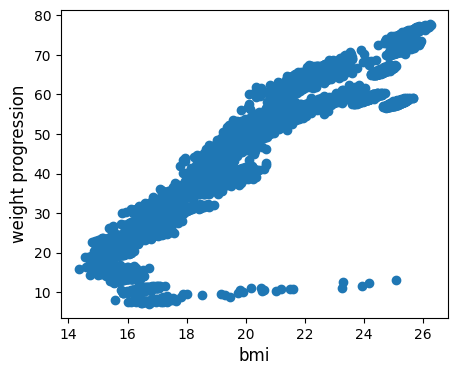

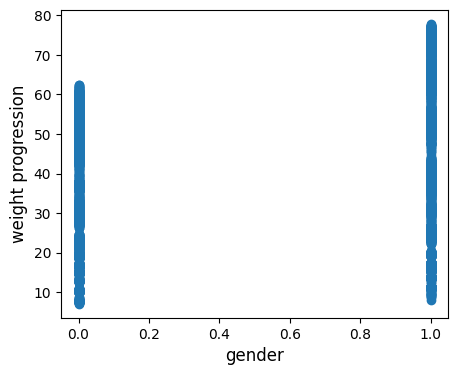

In [11]:
for feature_name in df.columns:
    plt.figure(figsize=(5, 4))
    plt.scatter(df[feature_name], df['weight'])
    plt.ylabel('weight progression', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

In [12]:
X = df.drop(['weight'], axis=1)
y = df['weight']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (7770, 4) | y shape: (7770,) 


#Линейная регрессия#

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [14]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [15]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  1.8576
  R2: 0.9896
 Adjusted R2: 0.9896
 Cross Validated R2: 0.9898


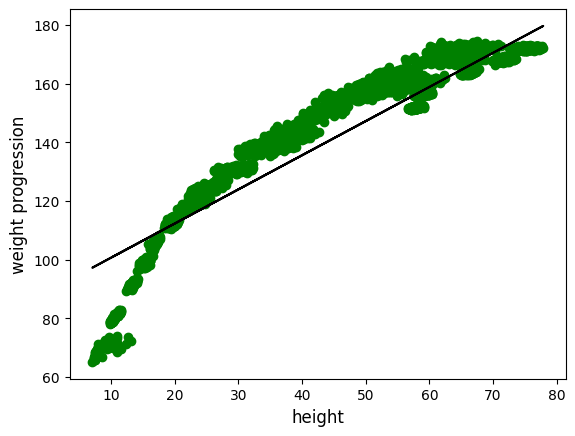

In [16]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = df['weight'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['height'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('weight progression', size=12)
plt.xlabel('height', size=12)
plt.show()

#Полиномиальная регрессия#

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [18]:
# Create a linear regression model

modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  0.0445
  R2: 1.0
 Adjusted R2: 1.0
 Cross Validated R2: 1.0


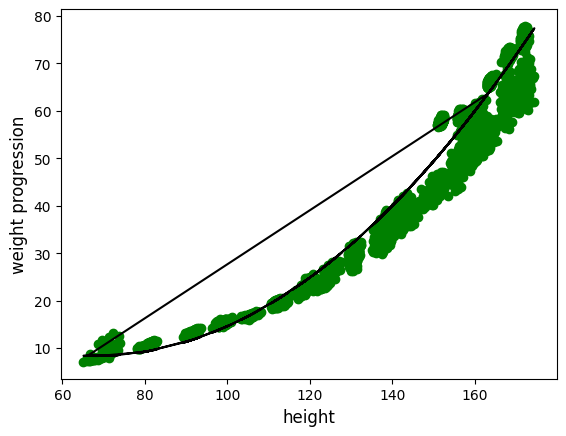

In [19]:
X2 = df['height'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['weight'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('weight progression', size=12)
plt.xlabel('height', size=12)
plt.show()


#Регрессия дерева принятия решени#

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)


In [21]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.2076
  R2: 0.9999
 Adjusted R2: 0.9999
 Cross Validated R2: 0.9998


#Регрессия случайного леса#

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor()

# Fit the model to the data
modelRF.fit(X_train, y_train)

#Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.1488
  R2: 0.9999
 Adjusted R2: 0.9999
 Cross Validated R2: 0.9999


#Регрессия опорных векторов (SVR)#

In [23]:
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR()

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1.9772
  R2: 0.9882
 Adjusted R2: 0.9882
 Cross Validated R2: 0.9876


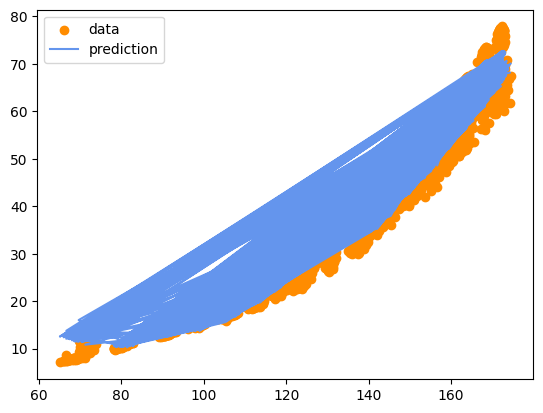

In [24]:
plt.scatter(X_train["height"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["height"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [25]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.1297
  R2: 0.9999
 Adjusted R2: 0.9999
 Cross Validated R2: 0.9999


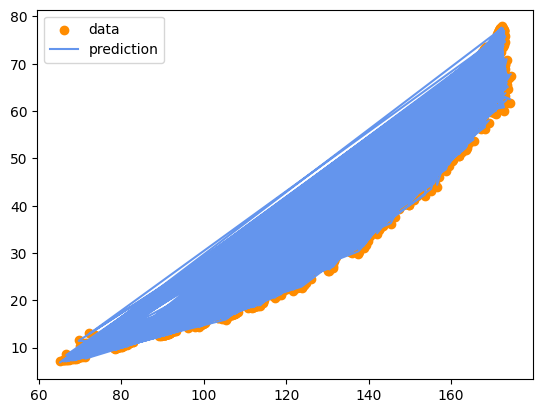

In [26]:
plt.scatter(X_train["height"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["height"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [27]:

# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1.9772
  R2: 0.9882
 Adjusted R2: 0.9882
 Cross Validated R2: 0.9876


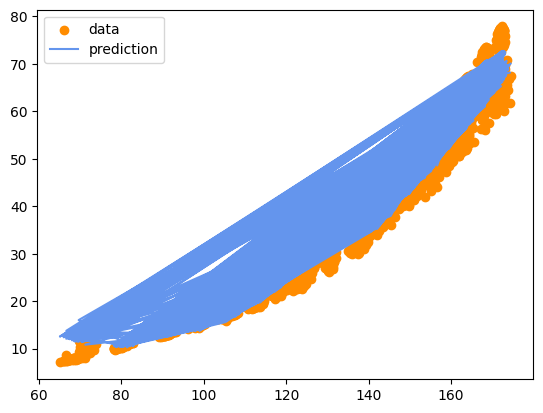

In [28]:
plt.scatter(X_train["height"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["height"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

#Регрессия ElasticNet#

In [30]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  1.8698
  R2: 0.9895
 Adjusted R2: 0.9894
 Cross Validated R2: 0.9896


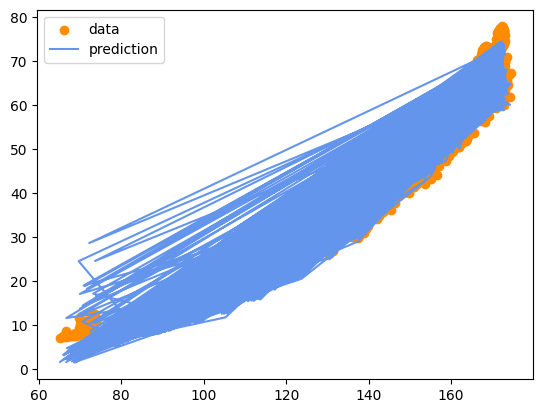

In [31]:
plt.scatter(X_train["height"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["height"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

#Лучшая модель#

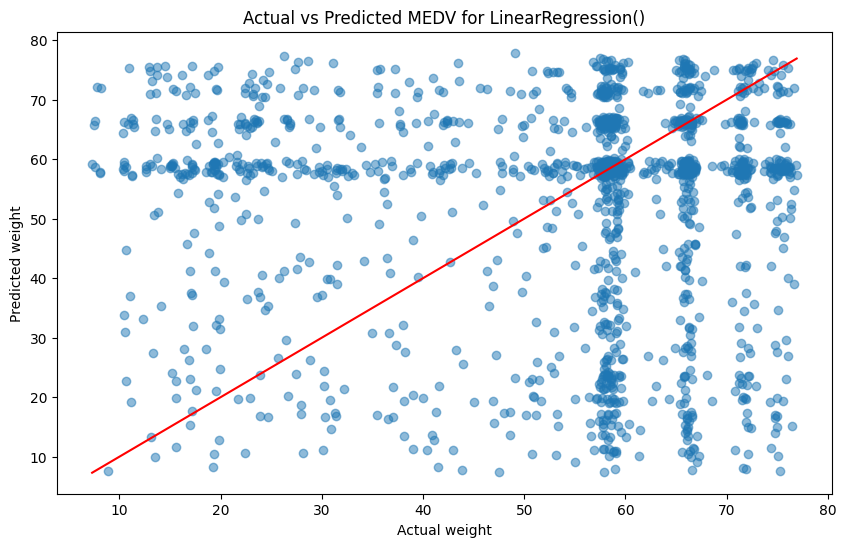

In [32]:
# Выбор модели с наилучшим R2
best_model = LinearRegression()

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

# Обучение наилучшей модели и предсказание на тестовой выборке
best_model.fit(X_p_train, y_p_train)
y_pred_best = best_model.predict(X_p_test)

# Визуализация предсказаний и фактических значений для наилучшей модели
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual weight')
plt.ylabel('Predicted weight')
plt.title(f'Actual vs Predicted MEDV for {best_model}')
plt.show()